# Udacity A/B testing Project

### Final Project Instructions

Experiment Overview: Free Trial Screener
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

### Metric Choice 

•	Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)  
•	Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)  
•	Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)  
•	Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)  
•	Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)  
•	Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)  
•	Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)


##### Invariant Metric  (variables that are not supposed to change across control and experiment groups)

|Metric|Reasoning|
|---|---|
|Number of cookies| user visits the page before they reach the prompt question|
|Number of clicks|  same as above, user clicks befor they see the prompt question|
|Click-through-probablity| CTP is basically number of clicks devided by number of cookies. So CTP should not change for either control or experiment group|

##### Evaluation Metrics  (variables that are expected to change across control and experiment groups)

|Metric|Reasoning|
|---|---|
|Gross Conversion| coulde decrease as some of the students would choose not to enroll after seeing the prompt question|
|Retention| could increase as number of user-ids to complete checkout (the denominator) would decrease|
|Net Conversion| could decrease as some of the students who would drop after one payment in control group would choose not to enroll in the experiment group knowing they won't be able to commit enough study time.|

### Measuring Variability

|Variant Name|Value|
|---|---|
|Unique cookies to view course overview page per day|40000|
|Unique cookies to click "Start free trial" per day|3200|
|Enrollments per day|660|
|Click-through-probability on "Start free trial"|0.08|
|Probability of enrolling, given click|0.20625|
|Probability of payment, given enroll|0.53|
|Probability of payment, given click|0.1093125|

In [43]:
#given a sample size of 5,000 cookies visiting the course overciew page, calculating the standard deviation
import math
print ("expected number of enrollments is 5,000*0.08*0.20625 = ", 5000*0.08*0.20625)
print ("expected number of unique cookies clicked 'Start free trail' per day is 5,000*0.08 =", 5000*0.08)

expected number of enrollments is 5,000*0.08*0.20625 =  82.5
expected number of unique cookies clicked 'Start free trail' per day is 5,000*0.08 = 400.0


In [17]:
print ("SD Gross Conversion is", math.sqrt(0.20625 * (1 - 0.20625) / 400))
print ("SD Retention is", math.sqrt(0.53*(1-0.53) / 82.5))
print ("SD Net Conversion is", math.sqrt(0.1093125*(1-0.1093125) / 400))

SD Gross Conversion is 0.020230604137049392
SD Retention is 0.05494901217850908
SD Net Conversion is 0.01560154458248846


### Sizing

using the online sample size calculation tool https://www.evanmiller.org/ab-testing/sample-size.html  
with an alpha of 0.05 and a beta of 0.2 to get teh sample size of each evaluation metric.

In [28]:
print ("Sample size using Gross Conversion is 25,835 (baseline conversion rate is 0.20625)")
print ("Sample size using Retention is 39,115 (baseline conversion rate is 0.53)")
print ("Sample size using Net Conversion is 27,413 (baseline conversion rate is 0.0.1093125)")


Sample size using Gross Conversion is 25,835 (baseline conversion rate is 0.20625)
Sample size using Retention is 39,115 (baseline conversion rate is 0.53)
Sample size using Net Conversion is 27,413 (baseline conversion rate is 0.0.1093125)


To get the Total Number of Pageview (for both Control and Experiment groups) use number we calculated from sample size calculator divide baseline conversion rate times two

In [29]:
print ("Total Number of Page view needed using Gross Conversion is 2*25835/0.08=", 2*25835/0.08)
print ("Total Number of Page view needed using Retention is 2*39115/(660/40000)=", 2*39115/(660/40000))
print ("Total Number of Page view needed using Net Conversion is 2*27413/0.08=", 2*27413/0.08)

Total Number of Page view needed using Gross Conversion is 2*25835/0.08= 645875.0
Total Number of Page view needed using Retention is 2*39115/(660/40000)= 4741212.121212121
Total Number of Page view needed using Net Conversion is 2*27413/0.08= 685325.0


Choose the largest number, we will need 4,741,212 pageviews to conduct the A/B test

### Duration and Exposure

Here we learn that using retention to evaluate the proposed change will be problematic, see calculation and analysis below

In [27]:
# Because the number of page view is more than four million it would require a very long period to collect data we need  
# even if we divert all the trafiice to the test
print("Number of Days required to conduct the test with 100% of traffice diverted to the test is 4,741,212/40,000 =", 4741212/40000)

Number of Days required to conduct the test with 100% of traffice diverted to the test is 4,741,212/40,000 = 118.5303


Calculation above diverted all of traffic to the test. Whihc means half of users are experiencing the new untested feature for next 4 months.  
if we want to bring down the risk of running untested new feature to less than 50% of the user, we will have to extend the experiment timeframe, which is also risky and costly.  
Unfortunately we have leave Retention out of our evaluation Metrics.  

This will change the Total Number of Page Views required to 685,324, which is the next largest number we calculated.

In [31]:
# Again, we first try to understand expected duration for the test by calculating expected days 
# if we divert all traffice to the test
print("Number of Days required to conduct the test with 100% of traffice diverted to the test is 685,324/40,000 =", 685324/40000)

Number of Days required to conduct the test with 100% of traffice diverted to the test is 685,324/40,000 = 17.1331


In [34]:
# 18 days is reasonable to me. Next we will see if we only divert half of the traffic
print("Number of Days required to conduct the test with 50% of traffice diverted to the test is 685,324/(40,000*0.5) =", 685324/(40000*0.5))

Number of Days required to conduct the test with 50% of traffice diverted to the test is 685,324/(40,000*0.5) = 34.2662


Now after the adjustment, out test will last 35 days, which is quite reasonable to me. 

### Experiment Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# read data
con = pd.read_csv('Control.csv')
exp = pd.read_csv('Experiment.csv')

In [4]:
print("Control Data")
con.head()

Control Data


,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [5]:
print ("Experiment Data")
exp.head()

Experiment Data


,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [13]:
# split Date column into Date and Days
con[['Day', 'Date']] = con.Date.str.split(", ", expand=True)
exp[['Day', 'Date']] = exp.Date.str.split(", ", expand=True)

In [15]:
print("Control Data")
con.head()

Control Data


,Date,Pageviews,Clicks,Enrollments,Payments,Day
0,Oct 11,7723,687,134.0,70.0,Sat
1,Oct 12,9102,779,147.0,70.0,Sun
2,Oct 13,10511,909,167.0,95.0,Mon
3,Oct 14,9871,836,156.0,105.0,Tue
4,Oct 15,10014,837,163.0,64.0,Wed


In [16]:
print ("Experiment Data")
exp.head()

Experiment Data


,Date,Pageviews,Clicks,Enrollments,Payments,Day
0,Oct 11,7716,686,105.0,34.0,Sat
1,Oct 12,9288,785,116.0,91.0,Sun
2,Oct 13,10480,884,145.0,79.0,Mon
3,Oct 14,9867,827,138.0,92.0,Tue
4,Oct 15,9793,832,140.0,94.0,Wed


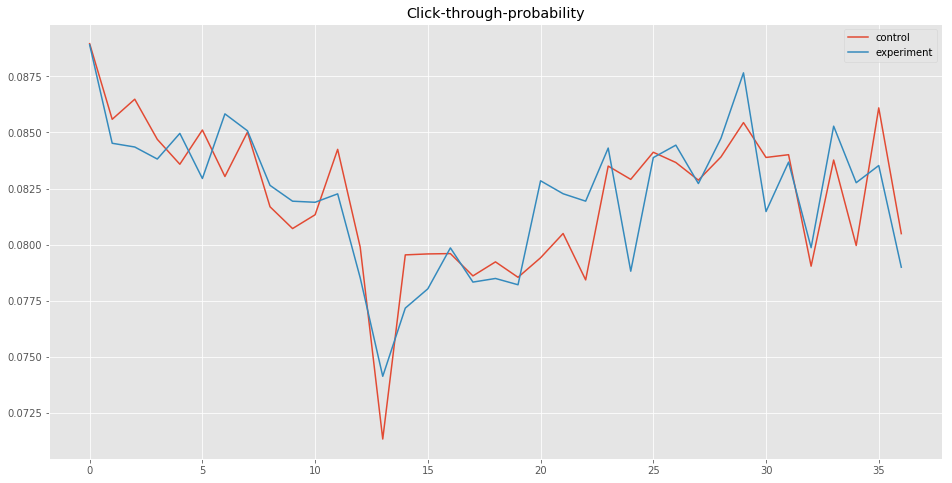

In [25]:
# plot the metrics
plt.style.use('ggplot')
csfont = {'fontname':'Arial'}
plt.figure(figsize=(16,8))
plt.title('Click-through-probability')
line1, = plt.plot(con['Clicks']/con['Pageviews'], label='control')
line2, = plt.plot(exp['Clicks']/exp['Pageviews'], label='experiment')
plt.legend(handles=[line1, line2])

In [54]:
# we only have 23 rows of data for enrollment and payment. Trim the dataset before plotting
con_2 = con[:23]
exp_2 = exp[:23]

In [33]:
con_2.head()

,Date,Pageviews,Clicks,Enrollments,Payments,Day
0,Oct 11,7723,687,134.0,70.0,Sat
1,Oct 12,9102,779,147.0,70.0,Sun
2,Oct 13,10511,909,167.0,95.0,Mon
3,Oct 14,9871,836,156.0,105.0,Tue
4,Oct 15,10014,837,163.0,64.0,Wed


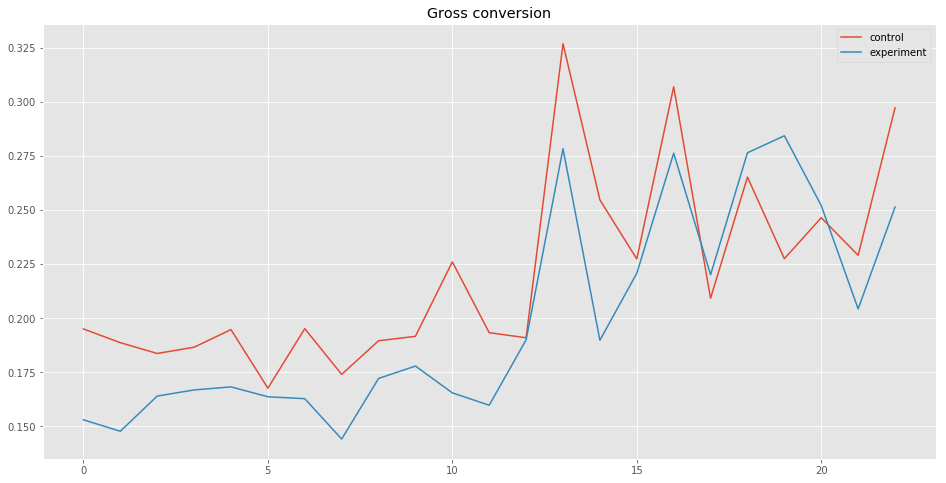

In [36]:
plt.figure(figsize=(16,8))
plt.title('Gross conversion')
line3, = plt.plot(con_2['Enrollments']/con_2['Clicks'], label='control')
line4, = plt.plot(exp_2['Enrollments']/exp_2['Clicks'], label='experiment')
plt.legend(handles=[line3, line4])

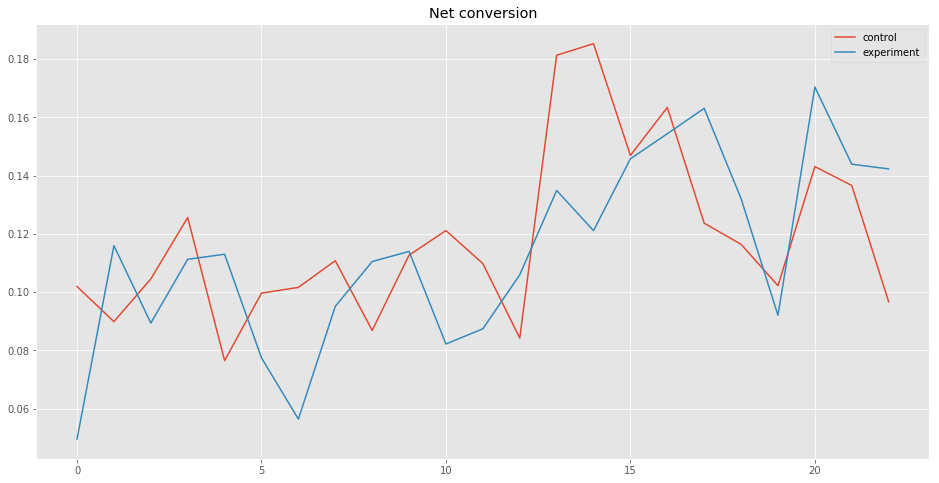

In [37]:
plt.figure(figsize=(16,8))
plt.title('Net conversion')
line3, = plt.plot(con_2['Payments']/con_2['Clicks'], label='control')
line4, = plt.plot(exp_2['Payments']/exp_2['Clicks'], label='experiment')
plt.legend(handles=[line3, line4])

### Sanity Check

In [42]:
#get total number of Pageviews and Clicks for Control and Experiment group
print ("Control Group:")
print ("Pageview = ", sum(con['Pageviews']), "\t", "Clicks = ", sum(con['Clicks']))
print ()
print ("Experiment Group:")
print ("Pageview = ", sum(exp['Pageviews']), "\t", "Clicks = ", sum(exp['Clicks']))


Control Group:
Pageview =  345543 	 Clicks =  28378

Experiment Group:
Pageview =  344660 	 Clicks =  28325


In [60]:
# calculation for Sanity Checks of invariants

# let p =0.5
p = 0.5

#Number of Cookies
print ("Number of Cookies:")
SE_cookies = math.sqrt(p*(1-p)/(345533+344660))
print ("Standard Error = " , SE_cookies)
ME_cookies = 1.96*SE_cookies
print ("Margin of Error = ", ME_cookies )
print ("Confidence Interval = ", (p-ME_cookies, p+ME_cookies)  )
print ("p-hat = ", 345543/(345543+344660) )

Number of Cookies:
Standard Error =  0.0006018451002237962
Margin of Error =  0.0011796163964386405
Confidence Interval =  (0.49882038360356135, 0.5011796163964386)
p-hat =  0.5006396668806133


p-hat falls in the Confidence Interval, passes Sanity Check

In [61]:
#Number of Clicks on "Start free trials"
print ("Number of Clicks on 'Start free trials':")
SE_users = math.sqrt(p*(1-p)/(28378+28325))
print ("Standard Error = " , SE_users)
ME_users = 1.96*SE_users
print ("Margin of Error = ", ME_users )
print ("Confidence Interval = ", (p-ME_users, p+ME_users)  )
print ("p-hat = ", 28378/(28378+28325) )

Number of Clicks on 'Start free trials':
Standard Error =  0.002099747079699252
Margin of Error =  0.0041155042762105335
Confidence Interval =  (0.49588449572378945, 0.5041155042762105)
p-hat =  0.5004673474066628


p-hat falls in the Confidence Interval, passes Sanity Check

In [62]:
#Click Through Probablity
print ("Click Through Probablity on 'Start Free Trial':")
p_pool = (28378+28325)/(345543+344660)
print ("pooled Probablity = ", p_pool)
SE_pool = math.sqrt(p_pool*(1-p_pool)*(1/345543+1/344660))
print ("Standard Error = ", SE_pool)
ME_pool = 1.96*SE_pool
print ("Margin of Error = ", ME_pool)
print ("Confidence Interval", (0-ME_pool, 0+ME_pool))
print ("d-hat = ", 28325/344660-28378/345543)

Click Through Probablity on 'Start Free Trial':
pooled Probablity =  0.08215409089789526
Standard Error =  0.0006610608156387222
Margin of Error =  0.0012956791986518956
Confidence Interval (-0.0012956791986518956, 0.0012956791986518956)
d-hat =  5.662709158693602e-05


d-hat falls in the Confidence Intercal, passes Santy Check

### Effect Size Test

In [57]:
#get total number of Clicks, Enrollment, and Payment for Control and Experiment group
print ("Control Group:")
print ("Clicks = ", sum(con_2['Clicks']), "\t", "Enrollments = ", sum(con_2['Enrollments']), "\t", "Payments = ", sum(con_2['Payments']))
print ()
print ("Experiment Group:")
print ("Clicks = ", sum(exp_2['Clicks']), "\t", "Enrollments = ", sum(exp_2['Enrollments']), "\t", "Payments = ", sum(exp_2['Payments']))


Control Group:
Clicks =  17293 	 Enrollments =  3785.0 	 Payments =  2033.0

Experiment Group:
Clicks =  17260 	 Enrollments =  3423.0 	 Payments =  1945.0


In [63]:
print ("Gross Conversion:")
p_pool = (3785+3423)/(17293+17260)
print ("pooled probablity = ", p_pool)
SE_pool = math.sqrt(p_pool*(1-p_pool)*(1/17293+1/17260))
print ("Standard Error = ", SE_pool)
ME_pool = 1.96*SE_pool
print ("Margin of Error = ", ME_pool)
d = 3423/17260 - 3785/17293
print ("Difference = ", d)
print ("Confidence Interval = ", (d-ME_pool, d+ME_pool))

Gross Conversion:
pooled probablity =  0.20860706740369866
Standard Error =  0.004371675385225936
Margin of Error =  0.008568483755042836
Difference =  -0.020554874580361565
Confidence Interval =  (-0.0291233583354044, -0.01198639082531873)


0 does not fall in confidence interval, hence Statistically Significant  
0.01 or -0.01, the dmin, does not fall in confidence intervall, hence practically significant 

In [64]:
print ("Net Conversion")
p_pool = (2033+1945)/(17293+17260)
print ("pooled probablity = ", p_pool)
SE_pool = math.sqrt(p_pool*(1-p_pool)*(1/17293+1/17260))
print ("Standard Error = ", SE_pool)
ME_pool = 1.96*SE_pool
print ("Margin of Error = ", ME_pool)
d = 1945/17260 - 2033/17293
print ("Difference = ", d)
print ("confidence Interval = ", (d-ME_pool, d+ME_pool))

Net Conversion
pooled probablity =  0.1151274853124186
Standard Error =  0.0034341335129324238
Margin of Error =  0.0067309016853475505
Difference =  -0.0048737226745441675
confidence Interval =  (-0.011604624359891718, 0.001857179010803383)


o falls in confidence interval, hence not statistically significant  
0.0075 or -0.0075, dmin, falls in confidence intercal, hence not practical significant

#### Bonferroni Correction

if we use Bonferroni Correction. the new alpha would be 0.0025, giving us a Z score of 2.5

In [65]:
print ("New Margin of Error Gross Conversion = ", 2.5*0.004371675385225936)
print ("New Margin of Error Net Conversion = ", 2.5*0.0034341335129324238)

New Margin of Error Gross Conversion =  0.010929188463064841
New Margin of Error Net Conversion =  0.00858533378233106


with the new Margin of Error, Net Conversion is still statistically significant between Control and Experiment groups.  
Hence we will not use Bonferroni Correction.

### Sign Test

use online Calculator https://www.graphpad.com/quickcalcs/binomial1/ to conduct the Sgin Test

In [72]:
#first get "successes" and "totals" for Gross Conversion and Net Conversion
print ("Gross Conversion:")
Gross_Conversion_success = sum(exp_2['Enrollments']/exp_2['Clicks'] >con_2['Enrollments']/con_2['Clicks'])
print ("Success:", Gross_Conversion_success, "\t", "Total", 23)
print ()
print ("Net Conversion:")
Net_Conversion_success = sum(exp_2['Payments']/exp_2['Clicks'] > con_2['Payments']/con_2['Clicks'])
print ("Success:", Net_Conversion_success, "\t", "Total", 23)

Gross Conversion:
Success: 4 	 Total 23

Net Conversion:
Success: 10 	 Total 23


p-Value for Gross Conversion is 0.0026  (Statistically Significant)

p_Value for Net Conversion is 0.6776  (not Statistically Significant)

## Conclusion

We do **not** recommend launch the change base on result of the testing

Reasons:
    1. changes in Net Conversion is not statistically significant, let alone practically signficant, which means our investment won't promise return.
    2. Gross Conversion is statistically significantly decreased, with analyzing the impact on Retention practically impossible, a decrease in Gross Conversion would lose the students who potentially found the course interest enough that they decided to commit more hours per week. 

#### Follow up Experiment

I would discuss with the engineering team to figure another metric to measure the financial impact of the change without taking too much time to conduct the test. And conduct another test with the new Metric to see the financial impact of the change.